In [1]:
from PyEMD import EMD, EEMD
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from vmdpy import VMD
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def imfs(y):
    
    #Intrinsic mode generation
    emd = EEMD() #Empirical Mode Decomposition
    emd.noise_seed(seed=42)
    print('----Starting EMD----')
    imfs_wp = emd(y.values)
    print('----EMD Finished----')
  
    df_imfs = pd.DataFrame()
  #Integration in the dataframe
    for num, imf in enumerate(imfs_wp):
        print('----Creating IMFwp{0} EMD columns----'.format(num+1))
        df_imfs['IMFwp{0}'.format(num+1)] = imf
    return df_imfs

In [3]:
def vmd(y,k):
    
    #Intrinsic mode generation
     #Empirical Mode Decomposition
    #. some sample parameters for VMD  
    alpha = 1       # moderate bandwidth constraint  
    tau = 0.           # noise-tolerance (no strict fidelity enforcement)  
    K = k              # k modes  
    DC = 0             # no DC part imposed  
    init = 1           # initialize omegas uniformly  
    tol = 1e-7
    u, u_hat, omega = VMD(y,alpha, tau, K, DC, init, tol)
    df_vmfs = pd.DataFrame()
    #Integration in the dataframe
    for num, imf in enumerate(u):
        #print('----Creating VMFwp{0} EMD columns----'.format(num+1))
        df_vmfs['IMFwp{0}'.format(num+1)] = imf
    return df_vmfs

In [4]:
train_wp1 = pd.read_csv('Data/Preprocessing/WP1_train_preprocessed.csv', sep=',')
train_wp2 = pd.read_csv('Data/Preprocessing/WP2_train_preprocessed.csv', sep=',')
train_wp3 = pd.read_csv('Data/Preprocessing/WP3_train_preprocessed.csv', sep=',')
train_wp4 = pd.read_csv('Data/Preprocessing/WP4_train_preprocessed.csv', sep=',')
train_wp5 = pd.read_csv('Data/Preprocessing/WP5_train_preprocessed.csv', sep=',')
train_wp6 = pd.read_csv('Data/Preprocessing/WP6_train_preprocessed.csv', sep=',')

In [4]:
to_drop = ['date','wd','forecast_time', 'forecast', "forecast_dist"]

In [6]:
np.shape(train_wp1['wp'])

(52416,)

In [20]:
nb_vmf = 5

In [21]:
vmf_wp1 = vmd(train_wp1['wp'],nb_vmf)

In [148]:
mean_squared_error(train_wp1['wp'],vmf_wp1.sum(axis=1),squared=False)

0.0005808243360136777

In [ ]:
for i in range(1,13):
    vmf = vmd(train_wp1['wp'],i)
    score = mean_squared_error(train_wp1['wp'],vmf.sum(axis=1),squared=False)
    print(i,score)

1 0.004646368417721829
2 0.001245336291852003
3 0.0006578764571229228
4 0.0005747340310748415
5 0.0005598474223037642
6 0.0005412981507305012
7 0.0005350379533277458
8 0.0005336917011487479


In [159]:
stats_vmf = pd.DataFrame(index =[i for i in vmf_wp1.columns if i!= 'date'])

In [160]:
stats_vmf['mean'] = np.mean(vmf_wp1, axis=0)
stats_vmf['std'] = np.std(vmf_wp1, axis=0)
stats_vmf['variance'] = np.var(vmf_wp1,axis=0)
stats_vmf['max'] = np.max(vmf_wp1,axis=0)
stats_vmf['min'] = np.min(vmf_wp1,axis=0)

In [161]:
stats_vmf

,mean,std,variance,max,min
IMFwp1,0.284171,0.263820,0.069601,0.972054,-0.025914
IMFwp2,0.000075,0.049977,0.002498,0.331720,-0.293849
IMFwp3,0.000337,0.063211,0.003996,0.313903,-0.279105
IMFwp4,0.000013,0.031351,0.000983,0.254180,-0.274297


In [ ]:
train_wp1_imfs = imfs(train_wp1['wp'])
train_wp2_imfs = imfs(train_wp2['wp'])
train_wp3_imfs = imfs(train_wp3['wp'])
train_wp4_imfs = imfs(train_wp4['wp'])
train_wp5_imfs = imfs(train_wp5['wp'])
train_wp6_imfs = imfs(train_wp6['wp'])

----Starting EMD----


In [17]:
train_wp1_imfs = train_wp1_imfs.drop('IMFwp16',axis=1)
train_wp2_imfs = train_wp2_imfs.drop('IMFwp16',axis=1)
train_wp3_imfs = train_wp3_imfs.drop('IMFwp16',axis=1)
train_wp4_imfs = train_wp4_imfs.drop('IMFwp16',axis=1)
train_wp5_imfs = train_wp5_imfs.drop('IMFwp16',axis=1)
train_wp6_imfs = train_wp6_imfs.drop('IMFwp16',axis=1)

In [ ]:
train_wp1_imfs.to_csv('Data/Preprocessing/WP1_train_imfs.csv', sep=',', index=False)
train_wp2_imfs.to_csv('Data/Preprocessing/WP2_train_imfs.csv', sep=',', index=False)
train_wp3_imfs.to_csv('Data/Preprocessing/WP3_train_imfs.csv', sep=',', index=False)
train_wp4_imfs.to_csv('Data/Preprocessing/WP4_train_imfs.csv', sep=',', index=False)
train_wp5_imfs.to_csv('Data/Preprocessing/WP5_train_imfs.csv', sep=',', index=False)
train_wp6_imfs.to_csv('Data/Preprocessing/WP6_train_imfs.csv', sep=',', index=False)

In [7]:
train_wp1_imfs = pd.read_csv('Data/Preprocessing/WP1_train_imfs.csv', sep=',')
train_wp2_imfs = pd.read_csv('Data/Preprocessing/WP2_train_imfs.csv', sep=',')
train_wp3_imfs = pd.read_csv('Data/Preprocessing/WP3_train_imfs.csv', sep=',')
train_wp4_imfs = pd.read_csv('Data/Preprocessing/WP4_train_imfs.csv', sep=',')
train_wp5_imfs = pd.read_csv('Data/Preprocessing/WP5_train_imfs.csv', sep=',')
train_wp6_imfs = pd.read_csv('Data/Preprocessing/WP6_train_imfs.csv', sep=',')

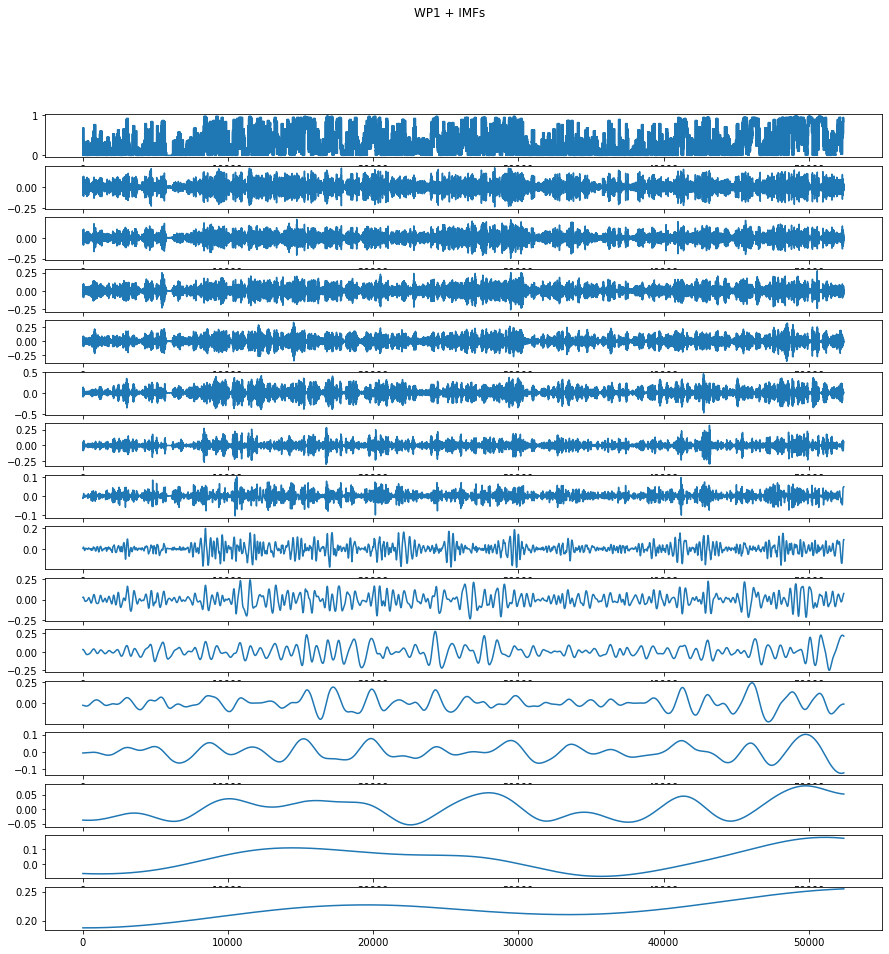

In [9]:
fig, axs = plt.subplots(16,figsize=(15,15))
fig.suptitle('WP1 + IMFs')
x_range = len(train_wp1)
x=range(x_range)
axs[0].plot(x, train_wp1.wp[:x_range])
for i in range(1,16):
    axs[i].plot(x, train_wp1_imfs['IMFwp'+str(i)][:x_range])

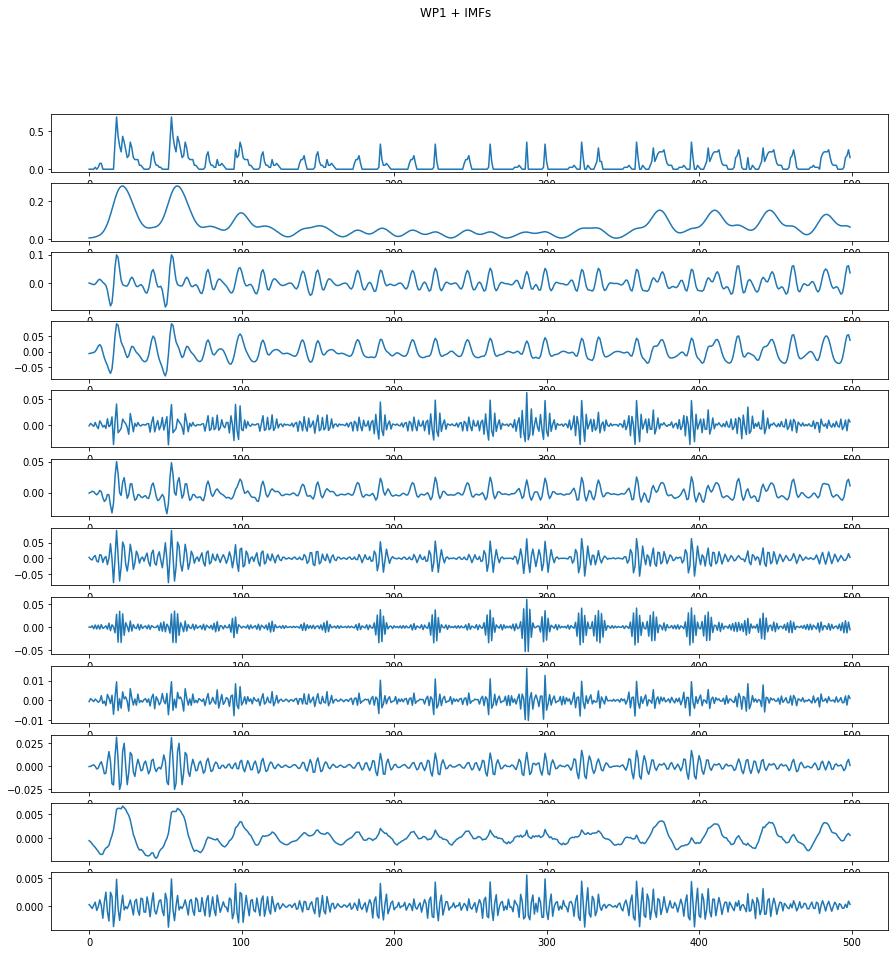

In [41]:
nb_vmf=11
vmf_wp1 = vmd(train_wp1['wp'],nb_vmf)
fig, axs = plt.subplots(nb_vmf+1,figsize=(15,15))
fig.suptitle('WP1 + IMFs')
x_range = 500
x=range(x_range)
axs[0].plot(x, train_wp1.wp[:x_range])
for i in range(1,nb_vmf+1):
    axs[i].plot(x, vmf_wp1['IMFwp'+str(i)][:x_range])


In [7]:
def imfs(y):
    
    #Intrinsic mode generation
    emd = EEMD(trials=20,max_imf=3) #Empirical Mode Decomposition
    emd.noise_seed(seed=42)
    #emd.max_imf()
    print('----Starting EMD----')
    imfs_wp = emd(y.values)
    print('----EMD Finished----')
  
    df_imfs = pd.DataFrame()
  #Integration in the dataframe
    for num, imf in enumerate(imfs_wp):
        print('----Creating IMFwp{0} EMD columns----'.format(num+1))
        df_imfs['IMFwp{0}'.format(num+1)] = imf
    return df_imfs

In [8]:
train_wp1_imfs_bis = imfs(train_wp1['wp'])

----Starting EMD----
----EMD Finished----
----Creating IMFwp1 EMD columns----
----Creating IMFwp2 EMD columns----
----Creating IMFwp3 EMD columns----
----Creating IMFwp4 EMD columns----
----Creating IMFwp5 EMD columns----
----Creating IMFwp6 EMD columns----
----Creating IMFwp7 EMD columns----
----Creating IMFwp8 EMD columns----
----Creating IMFwp9 EMD columns----
----Creating IMFwp10 EMD columns----
----Creating IMFwp11 EMD columns----
----Creating IMFwp12 EMD columns----
----Creating IMFwp13 EMD columns----
----Creating IMFwp14 EMD columns----
----Creating IMFwp15 EMD columns----
----Creating IMFwp16 EMD columns----


In [10]:
fft = np.fft.fft(train_wp1['wp'])
fft

array([14917.499        +0.j        ,   446.9225529  -957.04058361j,
         479.39681127+2553.26860899j, ...,  -309.56197453-2231.34536911j,
         479.39681127-2553.26860899j,   446.9225529  +957.04058361j])

In [12]:
train_wp1_imfs_bis.head()

,IMFwp1,IMFwp2,IMFwp3,IMFwp4,IMFwp5,IMFwp6,IMFwp7,IMFwp8,IMFwp9,IMFwp10,IMFwp11,IMFwp12,IMFwp13,IMFwp14,IMFwp15,IMFwp16
0,-0.009542,-0.005924,0.007033,-0.016749,-0.103210,-0.042116,-0.008182,0.006241,0.029422,0.036177,-0.025949,-0.000383,-0.061059,-0.046236,0.215437,0.280545
1,0.009381,-0.006643,0.005503,-0.012139,-0.109056,-0.044538,-0.008176,0.006613,0.029724,0.036192,-0.025997,-0.000387,-0.061062,-0.046237,0.215437,0.280545
2,0.001569,0.009137,-0.001739,0.002187,-0.116475,-0.046144,-0.008168,0.006983,0.030014,0.036200,-0.026044,-0.000392,-0.061064,-0.046238,0.215436,0.280546
3,-0.013947,0.014060,-0.005231,0.020901,-0.124577,-0.046951,-0.008152,0.007351,0.030291,0.036204,-0.026092,-0.000396,-0.061066,-0.046239,0.215436,0.280546
4,0.016997,-0.003603,0.002121,0.037434,-0.132101,-0.046996,-0.008125,0.007718,0.030554,0.036201,-0.026140,-0.000400,-0.061068,-0.046241,0.215436,0.280547


In [11]:
np.shape(fft)

(52416,)

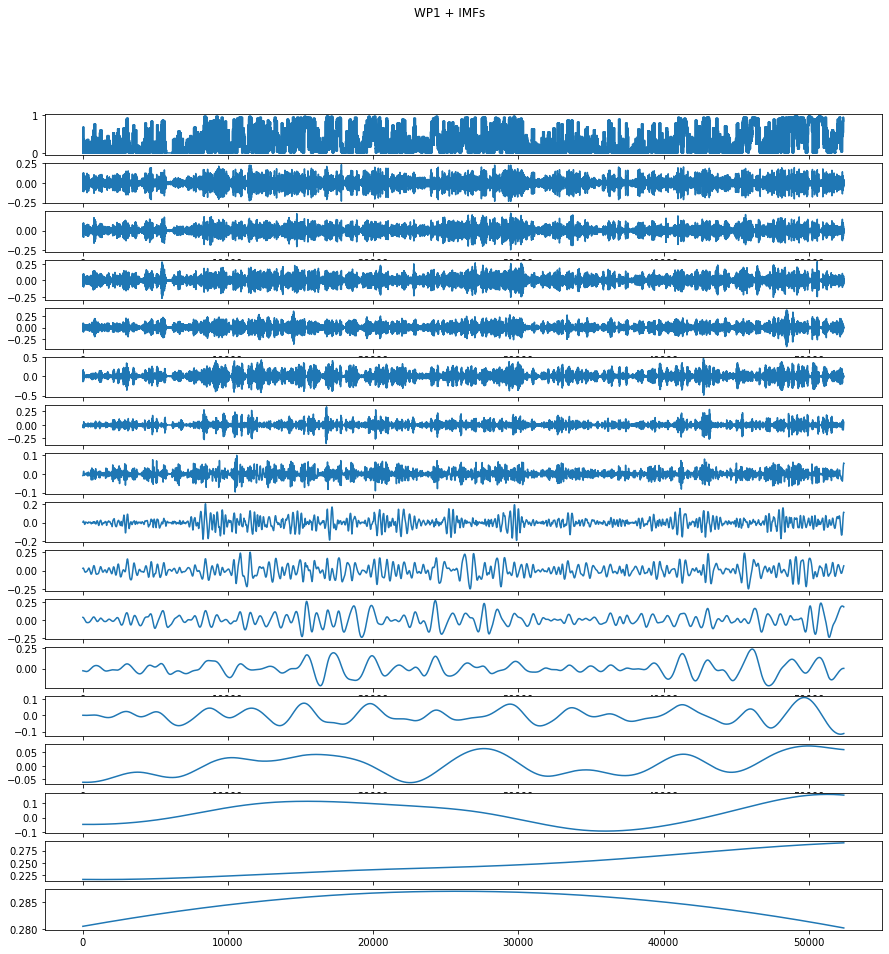

In [14]:
fig, axs = plt.subplots(17,figsize=(15,15))
fig.suptitle('WP1 + IMFs')
x_range = len(train_wp1)
x=range(x_range)
axs[0].plot(x, train_wp1.wp[:x_range])
for i in range(1,17):
    axs[i].plot(x, train_wp1_imfs_bis['IMFwp'+str(i)][:x_range])

In [15]:
mean_squared_error(train_wp1['wp'],train_wp1_imfs_bis.sum(axis=1),squared=False)

0.2810089696227607

In [16]:
train_wp1_imfs_bis.sum(axis=1)

0        0.255505
1        0.269158
2        0.275807
3        0.272137
4        0.302333
           ...   
52411    1.170754
52412    1.163257
52413    1.132986
52414    1.115156
52415    1.098005
Length: 52416, dtype: float64